# Hypothesis
Students who have more than 6 months prior experience in computer programming are more likely to rate the course difficulty as less than or equal to 3, on a scale where 1 represents easy.

In [13]:
%reload_ext autoreload
%autoreload 2
print("Autoreload of imported modules enabled.")

Autoreload of imported modules enabled.


First step is to import the csv of student survey data and convert it into a column-oriented table.

In [11]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

## To Begin the Investigation
* The two categories I am interested in for this question are "prior experience" and "difficulty rating".
* Convert the difficulty ratings from strings to int objects in order to easily categorize the ratings as "difficult" or "easy".


In [8]:
from data_utils import column_values, difficulty
values: list[str] = column_values(data_rows, "difficulty")

qual_ratings: list[str] = difficulty(values)

* Also I wanted to categorize responses for prior experience into either "more" or "little" experience.
* I have written new functions to qualitatively categorize the list of difficulty ratings and the list of prior experience.

In [30]:
from data_utils import column_values, sort_experience, head
all_expers: list[str] = column_values(data_rows, "prior_exp")
exp_ratings: list[str] = sort_experience(all_expers)


## Table of Relevant Data
In this step, I created a table limited to contain just the columns for row number, prior experience, and ratings. First I limited the table to the chosen headings, added the categorized data that I had sorted each list into, then used tabulate to make a table.

In [43]:
from data_utils import select, head
to_show: list[str] = ["row_number", "prior_exp", "difficulty"]
evidence: dict[str, list[str]] = select(columns, to_show)

evidence["Relative Experience"] = exp_ratings
evidence["Qualitative Rating"] = qual_ratings
sample_evid: dict[str, list[str]] = head(evidence, 10)
sample_evid

{'row_number': ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],
 'prior_exp': ['None to less than one month!',
  'None to less than one month!',
  'None to less than one month!',
  'None to less than one month!',
  'None to less than one month!',
  'None to less than one month!',
  'None to less than one month!',
  'None to less than one month!',
  'None to less than one month!',
  'None to less than one month!'],
 'difficulty': ['5', '5', '5', '5', '5', '5', '5', '5', '5', '5'],
 'Relative Experience': ['little',
  'little',
  'little',
  'little',
  'little',
  'little',
  'little',
  'little',
  'little',
  'little'],
 'Qualitative Rating': ['difficult',
  'difficult',
  'difficult',
  'difficult',
  'difficult',
  'difficult',
  'difficult',
  'difficult',
  'difficult',
  'difficult']}

Here I implement the tabulate function from ex07.

In [44]:
from tabulate import tabulate

hypothesis: dict[str, list[str, str]] = evidence

tabulate(hypothesis, hypothesis.keys(), "html")

row_number,prior_exp,difficulty,Relative Experience,Qualitative Rating
0,None to less than one month!,5,little,difficult
1,None to less than one month!,3,little,easy
2,None to less than one month!,5,little,difficult
3,None to less than one month!,6,little,difficult
4,None to less than one month!,4,little,difficult
5,Over 2 years,5,more,difficult
6,None to less than one month!,6,little,difficult
7,None to less than one month!,5,little,difficult
8,None to less than one month!,5,little,difficult
9,None to less than one month!,7,little,difficult


## Create a Bar Graph.
* In this step, I try a simple bar graph of the ratings students gave the course if they have more than 6 months of experience in compter languages.
* I predict a mode of responses in the data towards the lower difficulty ratings.
Result: 1:7, 2:17, 3:15, 4:18, 5:10, 6:2, 7:4,  67 responses

In [31]:
from data_utils import count, bar_graph
all_bar: dict[str, int] = count(values)
# 1:12, 2:33, 3:55, 4:121, 5:159, 6:113, 7:87
easy_bar: dict[str, int] = count(exp_ratings)
# little = 508, more = 67
for_bar: list[str] = bar_graph(values, exp_ratings)
count(for_bar)
# 1:7, 2:17, 3:15, 4:18, 5:10, 6:2, 7:4,  67 responses
# Plug in data: 7,17,15,18,10,2,4

{'little': 508, 'more': 67}


{'5': 10, '2': 17, '4': 18, '1': 7, '3': 15, '7': 4, '6': 2}

Here is the set up for a bar graph from ex07.

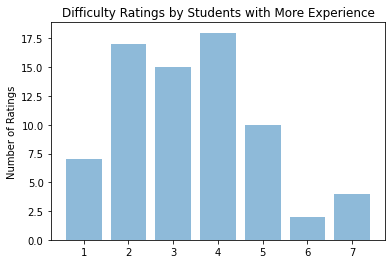

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

labels = ['1', '2', '3', '4', '5', '6', '7']
y_pos = [0, 1, 2, 3, 4, 5, 6]  # the order the labels will be arranged in bar chart
performance = [7,17,15,18,10,2,4]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Number of Ratings')
plt.title('Difficulty Ratings by Students with More Experience')

plt.show()

# The Conclusion

make a counter that categorizes responses of students in prior_exp as 'more than 6 months' or 'less than 6 months'. 
Also: fix head function 
End goal: this many students had more than 6 months experience and also rated the course difficulty as less than 4.